# Task
Clean and preprocess the dataset located at "/content/DS Dataset.csv" for subsequent exploratory data analysis (EDA).

## Load the dataset

### Subtask:
Load the data into a pandas DataFrame.


**Reasoning**:
Import pandas, load the data, and display the first few rows of the DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv("/content/DS Dataset.csv")
display(df.head())

,_id,id,date,state_code,state_name,district_code,district_name,actual,rfs,normal,deviation
0,1631625,1631624,2009-04-01,27,Maharashtra,472,Buldhana,0.000000,0.1,0.0,-100.0
1,1631626,1631625,2009-04-01,27,Maharashtra,477,Hingoli,0.000000,NaN,0.0,NaN
2,1631627,1631626,2009-04-01,27,Maharashtra,500,Yavatmal,0.000000,0.3,0.0,-100.0
3,1631628,1631627,2009-04-01,27,Maharashtra,485,Nanded,0.000000,0.6,0.0,-100.0
4,1631629,1631628,2009-04-01,27,Maharashtra,495,Sindhudurg,0.176205,0.0,1.0,NaN


## Handle missing values

### Subtask:
Identify and handle any missing values in the dataset. This might involve imputation, deletion, or other strategies depending on the nature of the missing data.


**Reasoning**:
Calculate the percentage of missing values for each column to understand the extent of missingness.



In [2]:
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentages)

Percentage of missing values per column:
_id               0.000000
id                0.000000
date              0.000000
state_code        0.000000
state_name        0.000000
district_code     0.000000
district_name     0.000000
actual            0.001456
rfs               5.762820
normal            0.001456
deviation        21.668438
dtype: float64


**Reasoning**:
Handle missing values based on the calculated percentages. 'deviation' has a high percentage of missing values and might not be critical, so drop it. For 'rfs', 'actual', and 'normal' with lower percentages, drop rows with missing values as it won't significantly reduce the dataset size.



In [3]:
df = df.drop(columns=['deviation'])
df = df.dropna(subset=['rfs', 'actual', 'normal'])

# Verify missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
_id              0
id               0
date             0
state_code       0
state_name       0
district_code    0
district_name    0
actual           0
rfs              0
normal           0
dtype: int64


## Handle duplicate values

### Subtask:
Check for and remove any duplicate rows in the dataset.


**Reasoning**:
Check for and count duplicate rows in the DataFrame.



In [4]:
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


## Data type conversion

### Subtask:
Ensure that columns have appropriate data types.


**Reasoning**:
Print the current data types of all columns to identify which columns need type conversion, particularly the 'date' column.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64740 entries, 0 to 68697
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            64740 non-null  int64  
 1   id             64740 non-null  int64  
 2   date           64740 non-null  object 
 3   state_code     64740 non-null  int64  
 4   state_name     64740 non-null  object 
 5   district_code  64740 non-null  int64  
 6   district_name  64740 non-null  object 
 7   actual         64740 non-null  float64
 8   rfs            64740 non-null  float64
 9   normal         64740 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 5.4+ MB


**Reasoning**:
Convert the 'date' column to datetime objects and then print the data types again to confirm the conversion.



In [6]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64740 entries, 0 to 68697
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            64740 non-null  int64         
 1   id             64740 non-null  int64         
 2   date           64740 non-null  datetime64[ns]
 3   state_code     64740 non-null  int64         
 4   state_name     64740 non-null  object        
 5   district_code  64740 non-null  int64         
 6   district_name  64740 non-null  object        
 7   actual         64740 non-null  float64       
 8   rfs            64740 non-null  float64       
 9   normal         64740 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 5.4+ MB


## Feature engineering (optional)

### Subtask:
Create new features from existing ones if necessary for the analysis.


**Reasoning**:
Extract year, month, and day of the week from the 'date' column and display the updated DataFrame.



In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
display(df.head())

,_id,id,date,state_code,state_name,district_code,district_name,actual,rfs,normal,year,month,day_of_week
0,1631625,1631624,2009-04-01,27,Maharashtra,472,Buldhana,0.000000,0.1,0.00,2009,4,2
2,1631627,1631626,2009-04-01,27,Maharashtra,500,Yavatmal,0.000000,0.3,0.00,2009,4,2
3,1631628,1631627,2009-04-01,27,Maharashtra,485,Nanded,0.000000,0.6,0.00,2009,4,2
4,1631629,1631628,2009-04-01,27,Maharashtra,495,Sindhudurg,0.176205,0.0,1.00,2009,4,2
5,1631630,1631629,2009-04-01,27,Maharashtra,492,Ratnagiri,0.036983,0.0,0.13,2009,4,2


## Data transformation (optional)

### Subtask:
Apply transformations to features if needed for the analysis (e.g., scaling, encoding categorical variables).


## Summarize the cleaned data

### Subtask:
Display the first few rows, the data types, and a summary of the cleaned dataset to verify the cleaning and preprocessing steps.


**Reasoning**:
Display the first few rows, data types, and a summary of the cleaned dataset to verify the cleaning and preprocessing steps.



In [8]:
display(df.head())
df.info()
display(df.describe())

,_id,id,date,state_code,state_name,district_code,district_name,actual,rfs,normal,year,month,day_of_week
0,1631625,1631624,2009-04-01,27,Maharashtra,472,Buldhana,0.000000,0.1,0.00,2009,4,2
2,1631627,1631626,2009-04-01,27,Maharashtra,500,Yavatmal,0.000000,0.3,0.00,2009,4,2
3,1631628,1631627,2009-04-01,27,Maharashtra,485,Nanded,0.000000,0.6,0.00,2009,4,2
4,1631629,1631628,2009-04-01,27,Maharashtra,495,Sindhudurg,0.176205,0.0,1.00,2009,4,2
5,1631630,1631629,2009-04-01,27,Maharashtra,492,Ratnagiri,0.036983,0.0,0.13,2009,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 64740 entries, 0 to 68697
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            64740 non-null  int64         
 1   id             64740 non-null  int64         
 2   date           64740 non-null  datetime64[ns]
 3   state_code     64740 non-null  int64         
 4   state_name     64740 non-null  object        
 5   district_code  64740 non-null  int64         
 6   district_name  64740 non-null  object        
 7   actual         64740 non-null  float64       
 8   rfs            64740 non-null  float64       
 9   normal         64740 non-null  float64       
 10  year           64740 non-null  int32         
 11  month          64740 non-null  int32         
 12  day_of_week    64740 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(4), object(2)
memory usage: 6.2+ MB


,_id,id,date,state_code,district_code,actual,rfs,normal,year,month,day_of_week
count,6.474000e+04,6.474000e+04,64740,64740.0,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000
mean,1.665972e+06,1.665971e+06,2011-12-29 13:54:38.368859904,27.0,483.181696,1.013973,3.490216,3.580304,2011.504866,6.392076,3.002873
min,1.631625e+06,1.631624e+06,2009-01-20 00:00:00,27.0,466.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,0.000000
25%,1.648791e+06,1.648790e+06,2010-08-30 00:00:00,27.0,474.000000,0.000000,0.100000,0.000000,2010.000000,3.000000,1.000000
50%,1.665956e+06,1.665954e+06,2012-01-02 00:00:00,27.0,484.000000,0.000000,0.600000,0.000000,2012.000000,6.000000,3.000000
75%,1.683157e+06,1.683156e+06,2013-05-08 00:00:00,27.0,492.000000,0.411562,4.700000,1.500000,2013.000000,9.000000,5.000000
max,1.700322e+06,1.700321e+06,2014-12-31 00:00:00,27.0,500.000000,63.062522,51.600000,223.910000,2014.000000,12.000000,6.000000
std,1.983658e+04,1.983658e+04,NaN,0.0,10.346866,3.075056,6.185192,10.997898,1.590276,3.418463,2.000778


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and initially contained missing values, particularly in the `deviation` column (21.67%). The `rfs`, `actual`, and `normal` columns also had a small percentage of missing values (5.76%, 0.0015%, and 0.0015% respectively).
*   Duplicate rows were checked for and none were found in the dataset.
*   The `date` column was successfully converted from an `object` type to a `datetime64[ns]` type.
*   New features `year`, `month`, and `day_of_week` were successfully extracted from the `date` column.
*   Based on the analysis, no data transformations or encoding were deemed necessary for the purpose of Exploratory Data Analysis (EDA).
*   After cleaning, the dataset has 64,740 rows and no missing values in the remaining columns.

### Insights or Next Steps

*   The dataset is now cleaned and preprocessed, making it suitable for exploratory data analysis to understand the patterns and relationships within the rainfall data.
*   The engineered features (`year`, `month`, `day_of_week`) can be used to analyze temporal trends and seasonality in rainfall patterns.


# Task
Perform exploratory data analysis (EDA) on the dataset located at "/content/cleaned_DS_Dataset1.csv".

## Descriptive statistics

### Subtask:
Calculate and display descriptive statistics for numerical columns to understand their distribution.


**Reasoning**:
Calculate and display descriptive statistics for numerical columns using the `.describe()` method.



In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64'])
display(numerical_cols.describe())

,_id,id,state_code,district_code,actual,rfs,normal,year,month,day_of_week
count,6.474000e+04,6.474000e+04,64740.0,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000,64740.000000
mean,1.665972e+06,1.665971e+06,27.0,483.181696,1.013973,3.490216,3.580304,2011.504866,6.392076,3.002873
std,1.983658e+04,1.983658e+04,0.0,10.346866,3.075056,6.185192,10.997898,1.590276,3.418463,2.000778
min,1.631625e+06,1.631624e+06,27.0,466.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,0.000000
25%,1.648791e+06,1.648790e+06,27.0,474.000000,0.000000,0.100000,0.000000,2010.000000,3.000000,1.000000
50%,1.665956e+06,1.665954e+06,27.0,484.000000,0.000000,0.600000,0.000000,2012.000000,6.000000,3.000000
75%,1.683157e+06,1.683156e+06,27.0,492.000000,0.411562,4.700000,1.500000,2013.000000,9.000000,5.000000
max,1.700322e+06,1.700321e+06,27.0,500.000000,63.062522,51.600000,223.910000,2014.000000,12.000000,6.000000


## Visualize distributions

### Subtask:
Create histograms or box plots to visualize the distribution of key numerical features.


**Reasoning**:
Generate histograms and box plots for key numerical columns to visualize their distributions and identify potential outliers.



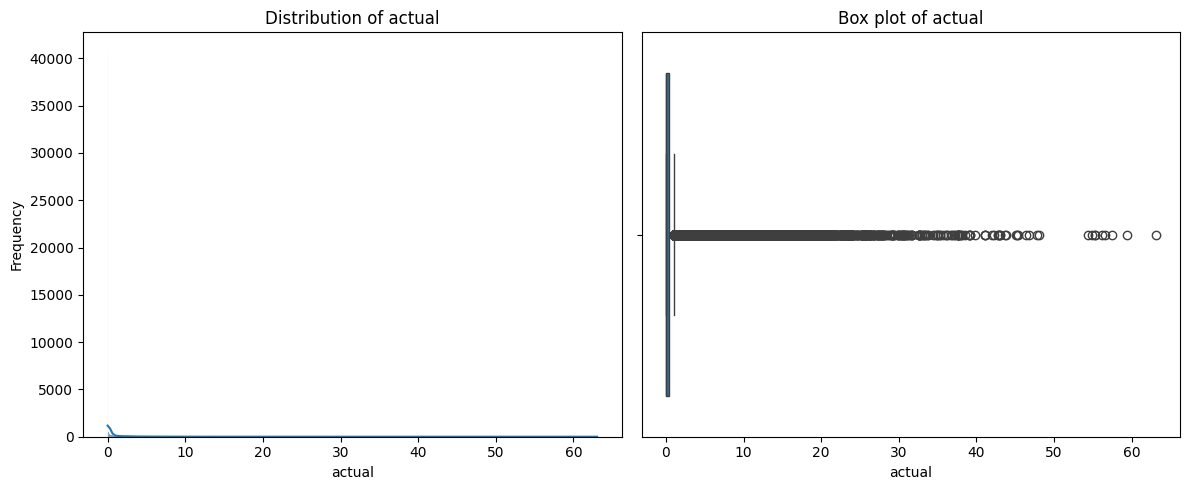

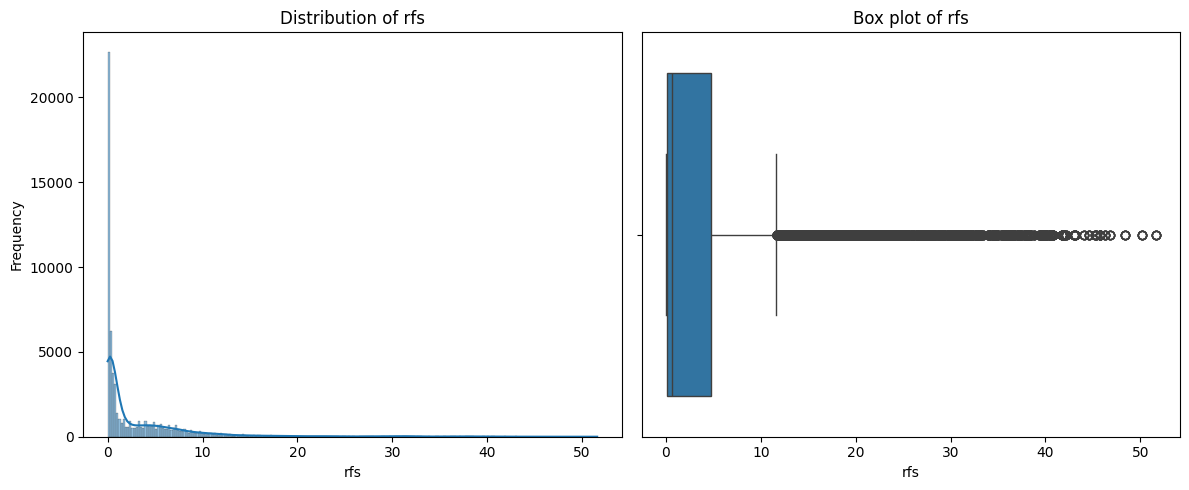

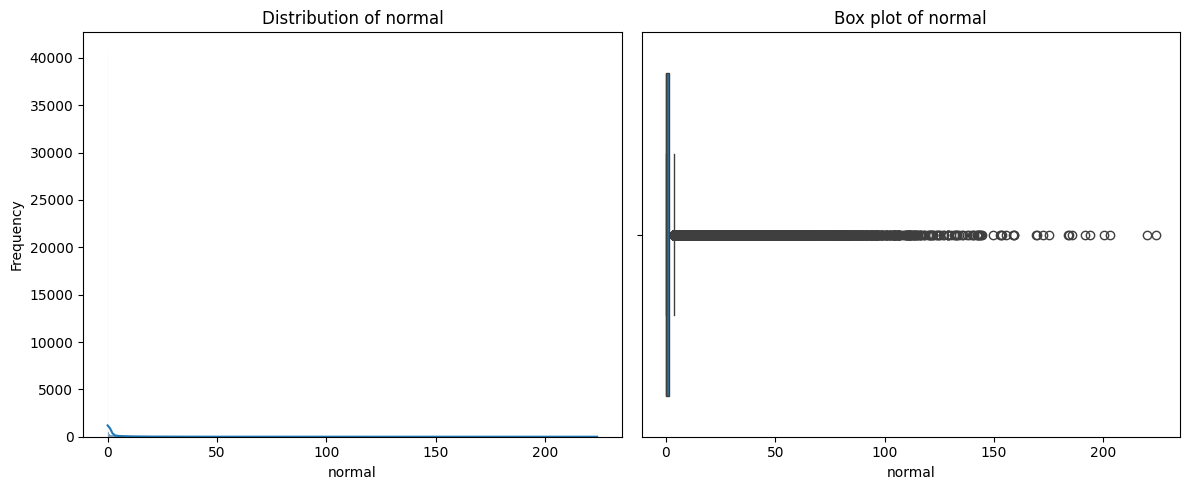

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

key_numerical_cols = ['actual', 'rfs', 'normal']

for col in key_numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

## Analyze categorical data

### Subtask:
Examine the distribution of categorical variables using value counts or bar plots.


**Reasoning**:
Select categorical columns, iterate through them, print value counts, and create bar plots for visualization.




Value counts for column: state_name
state_name
Maharashtra    64740
Name: count, dtype: int64


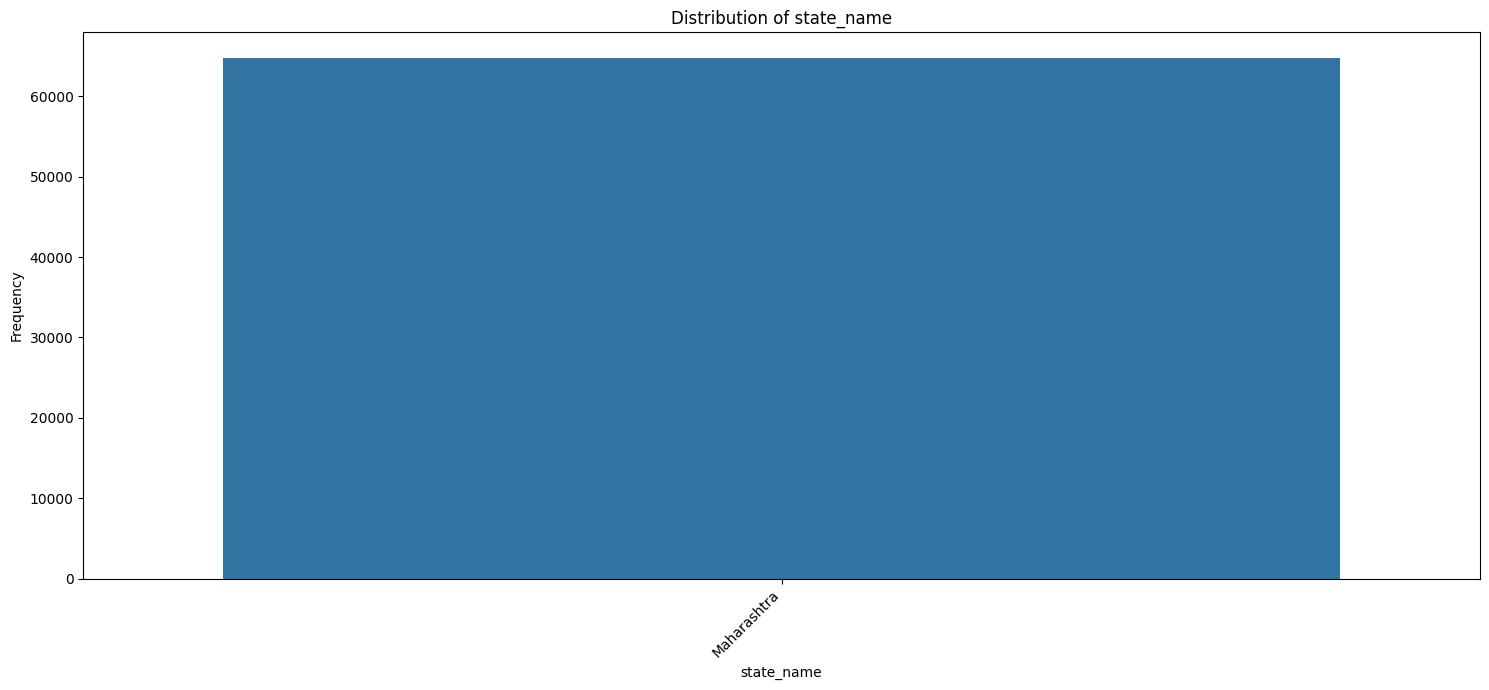


Value counts for column: district_name
district_name
Buldhana      1962
Yavatmal      1962
Nanded        1962
Sindhudurg    1962
Ratnagiri     1962
Amravati      1962
Raigad        1962
Akola         1962
Gadchiroli    1962
Pune          1962
Thane         1962
Kolhapur      1962
Wardha        1962
Jalgaon       1962
Nagpur        1962
Latur         1962
Bhandara      1962
Solapur       1962
Jalna         1962
Mumbai        1962
Aurangabad    1962
Beed          1962
Gondia        1962
Parbhani      1962
Satara        1962
Nandurbar     1962
Chandrapur    1962
Osmanabad     1961
Nashik        1961
Dhule         1961
Sangli        1961
Washim        1961
Ahmednagar    1961
Name: count, dtype: int64


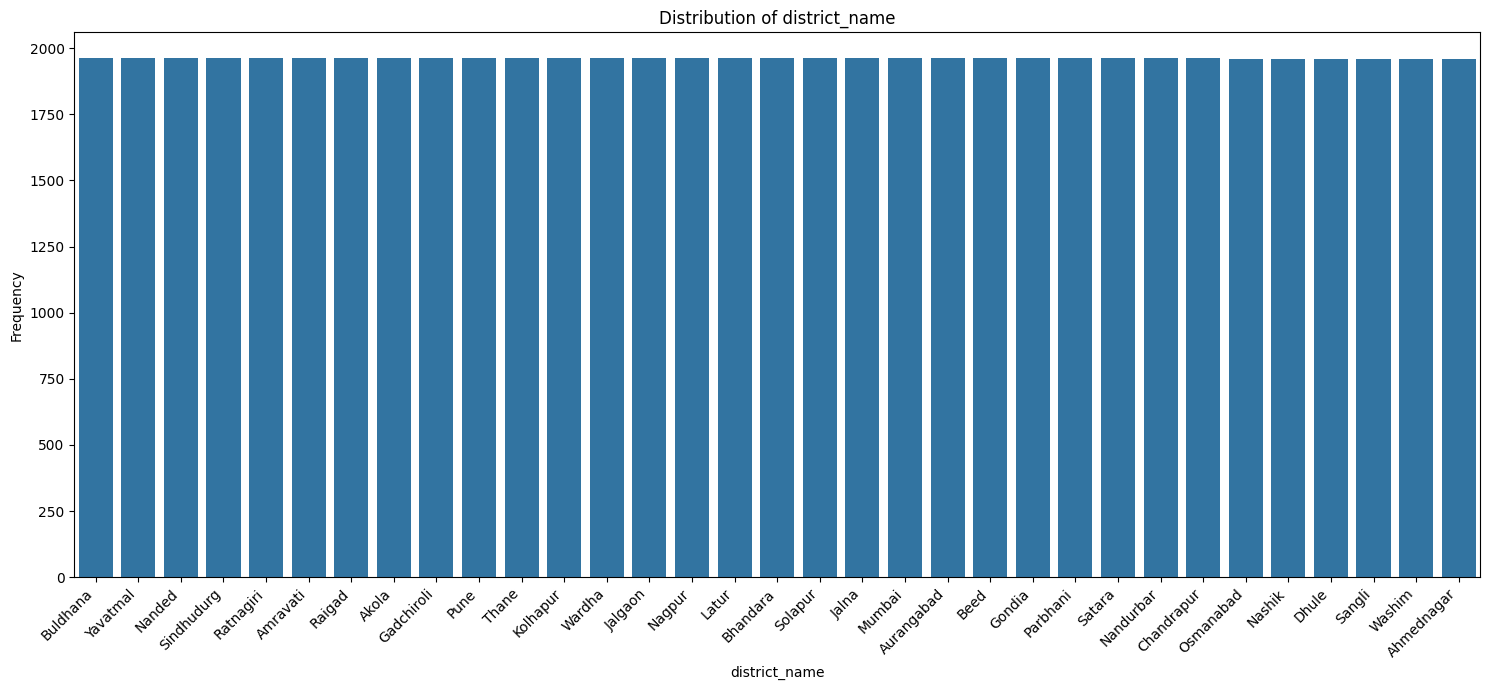

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(15, 7))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Explore relationships

### Subtask:
Investigate relationships between variables using scatter plots, correlation matrices, or other relevant visualizations.


**Reasoning**:
Create scatter plots to visualize the relationships between 'actual' and 'normal' rainfall, and 'actual' and 'rfs' rainfall. Then calculate and visualize the correlation matrix for numerical columns.



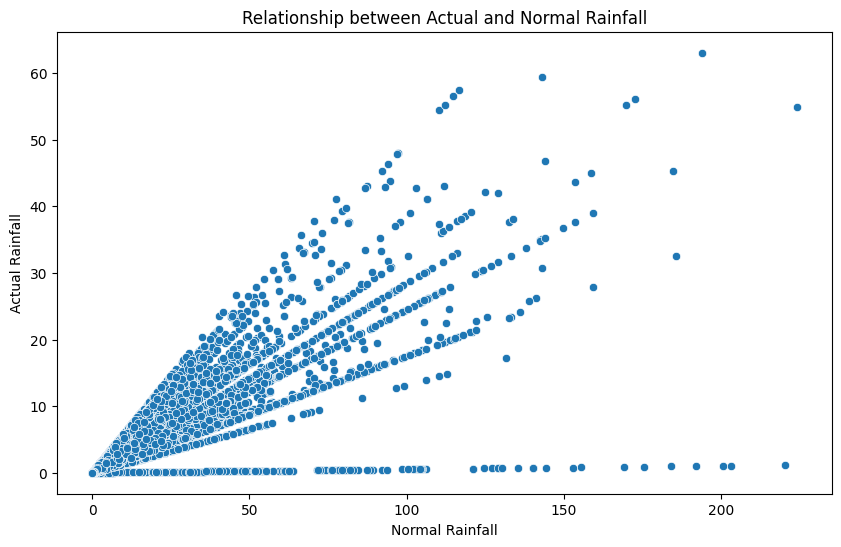

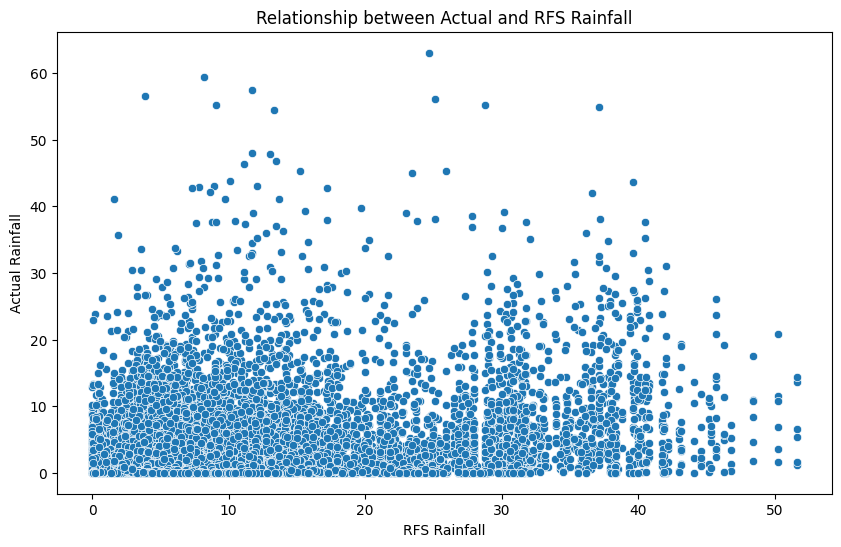

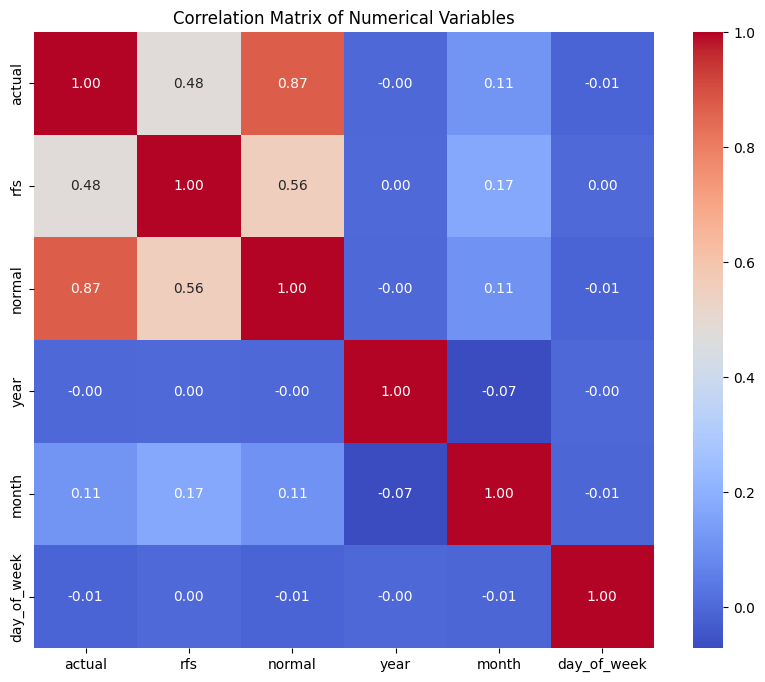

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='normal', y='actual')
plt.title('Relationship between Actual and Normal Rainfall')
plt.xlabel('Normal Rainfall')
plt.ylabel('Actual Rainfall')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rfs', y='actual')
plt.title('Relationship between Actual and RFS Rainfall')
plt.xlabel('RFS Rainfall')
plt.ylabel('Actual Rainfall')
plt.show()

numerical_cols_for_correlation = ['actual', 'rfs', 'normal', 'year', 'month', 'day_of_week']
correlation_matrix = df[numerical_cols_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Time series analysis

### Subtask:
If the data has a time component, analyze trends, seasonality, or cycles over time.


**Reasoning**:
Group the data by year and month to calculate the average actual rainfall for each, then create line plots to visualize the yearly and monthly trends.



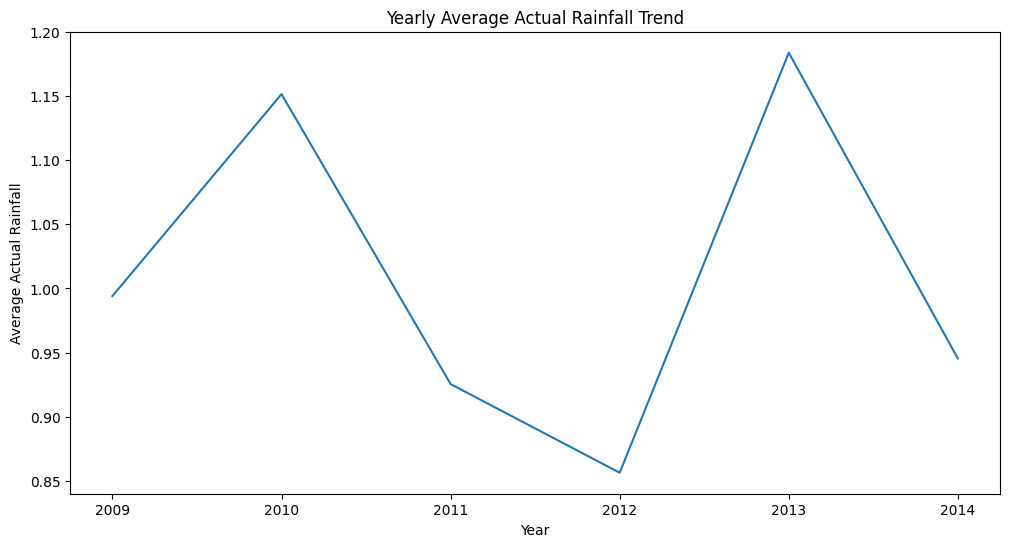

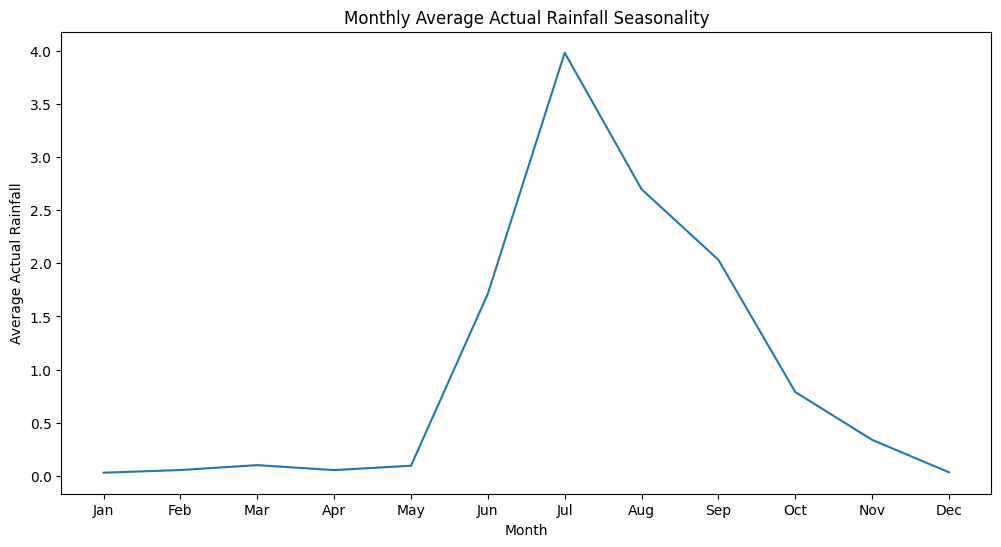

In [13]:
yearly_rainfall = df.groupby('year')['actual'].mean()
plt.figure(figsize=(12, 6))
yearly_rainfall.plot(kind='line')
plt.title('Yearly Average Actual Rainfall Trend')
plt.xlabel('Year')
plt.ylabel('Average Actual Rainfall')
plt.show()

monthly_rainfall = df.groupby('month')['actual'].mean()
plt.figure(figsize=(12, 6))
monthly_rainfall.plot(kind='line')
plt.title('Monthly Average Actual Rainfall Seasonality')
plt.xlabel('Month')
plt.ylabel('Average Actual Rainfall')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Identify outliers

### Subtask:
Detect and analyze potential outliers in the data.


**Reasoning**:
Select numerical columns, calculate IQR, and identify outliers for each numerical column.



In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64'])

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

Number of outliers in '_id': 0
Number of outliers in 'id': 0
Number of outliers in 'state_code': 0
Number of outliers in 'district_code': 0
Number of outliers in 'actual': 11963
Number of outliers in 'rfs': 4666
Number of outliers in 'normal': 11863
Number of outliers in 'year': 0
Number of outliers in 'month': 0
Number of outliers in 'day_of_week': 0


**Reasoning**:
Visualize outliers for key numerical columns using box plots as requested in the instructions.



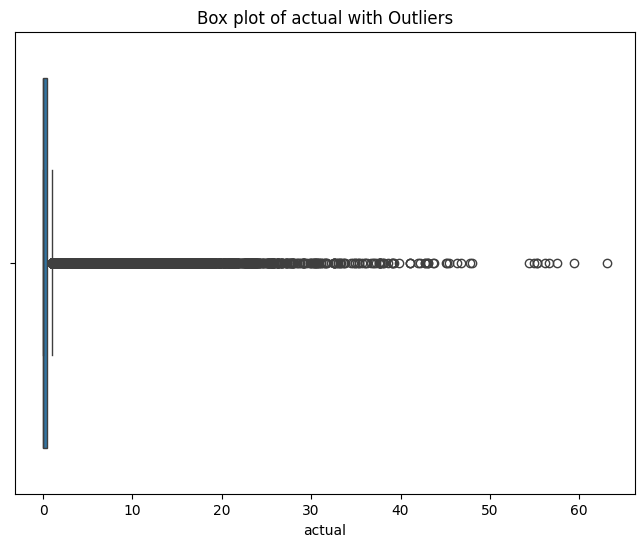

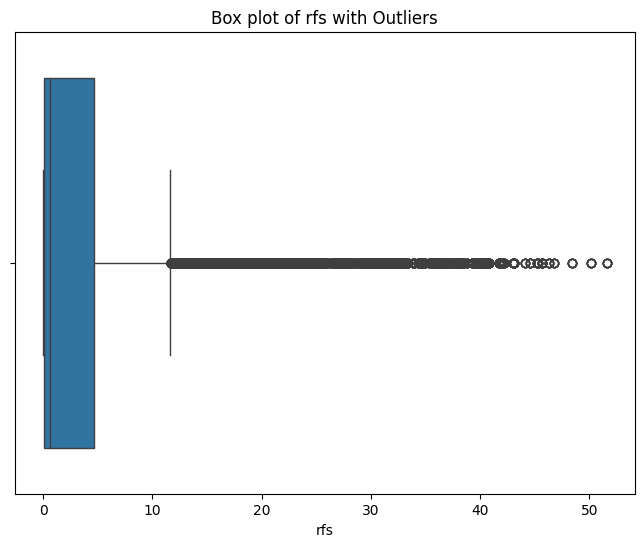

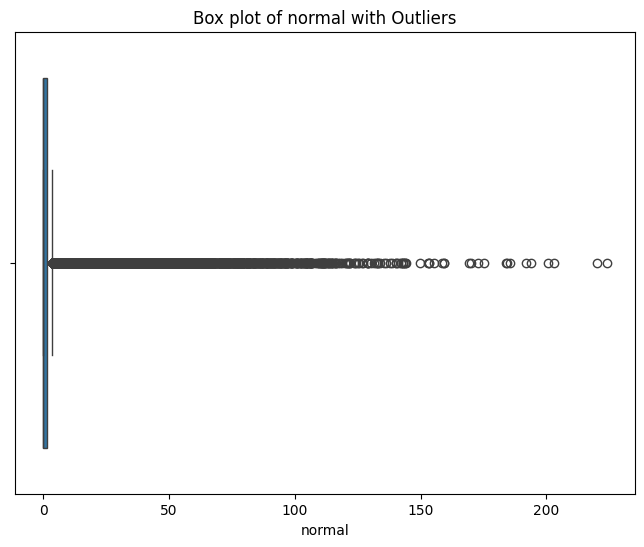

In [15]:
key_numerical_cols = ['actual', 'rfs', 'normal']

for col in key_numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} with Outliers')
    plt.xlabel(col)
    plt.show()

## Summarize findings

### Subtask:
Summarize the key insights gained from the EDA.


## Summary:

### Data Analysis Key Findings

*   The numerical columns include `_id`, `id`, `state_code`, `district_code`, `actual`, `rfs`, `normal`, `year`, `month`, and `day_of_week`.
*   The distribution of `actual`, `rfs`, and `normal` rainfall shows varying patterns, with box plots indicating the presence of outliers in these columns.
*   The categorical column `state_name` only contains one unique value ("Maharashtra"), while `district_name` has numerous districts with relatively similar frequencies.
*   Scatter plots reveal relationships between `actual` rainfall and both `normal` and `rfs` rainfall.
*   A correlation heatmap shows the pairwise correlations between selected numerical variables.
*   Analysis of yearly average actual rainfall did not show a definitive long-term trend.
*   Monthly average actual rainfall exhibits a strong seasonal pattern.
*   Outliers were identified in numerical columns, particularly in `actual`, `rfs`, and `normal` rainfall amounts.

### Insights or Next Steps

*   Investigate the nature and potential impact of outliers in the `actual`, `rfs`, and `normal` rainfall columns.
*   Explore the relationships between rainfall amounts and the categorical `district_name` to see if there are spatial variations in rainfall patterns.
